## Project Outline
- We have been tasked to create a team allocation simulator using algorithms that will organize students into well-rounded groups for a data science course. 
- Students from different tutorial group should not be grouped together

### Flowchart

image for flowchart

### Appending Information from CSV
Read through the csv file

Create a student list

Import the information into the list

In [1]:
# Initialize Global Variable STUDENTS_LIST and append the information from the CSV File 
STUDENTS_LIST = []
with open('records.csv', 'r') as records:
    next(records) # Start from second line onwards
    for student in records:
        tutorial_group, student_id, school, name, gender, cgpa = student.strip().split(',')
        STUDENTS_LIST.append({ #Adding each student into dictionary
            'Tutorial Group': tutorial_group,
            'Student ID': student_id,
            'Name': name,
            'School': school,
            'Gender': gender,
            'CGPA': float(cgpa)
        })

### Split Into Tutorial Groups
We split the students into groups based on the size of their tutorial class

Assign the new ordered lists into a new list called "tutorial_ordered list"

In [2]:
tutorial_ordered_list = []
def split_into_groups(records_list, group_size):
        return [records_list[i:i + group_size] for i in range(0, len(records_list), group_size)]
    
    #Spliting the groups based on tutorial            
tutorial_ordered_list = split_into_groups(STUDENTS_LIST, 50)

### Merge Sort Algorithm
Merge sort is a divide-and-conquer sorting algorithm that recursively splits a list into halves until each sublist has one element. It then merges these sublists back together in sorted order using our key, which is by the student's CGPA

In [3]:
def merge_sort(list_to_sort, key= lambda x: x):
        list_len=len(list_to_sort) #calc len of list


        if list_len<=1:
            return list_to_sort #return the list if its length is 1 or less
   
        left_half=merge_sort(list_to_sort[:list_len//2], key) #call mergesort on left half (will recurse down the left tree)
        right_half=merge_sort(list_to_sort[list_len//2:], key) #call mergesort on right half (only when left tree is left with 1 element)


        return merge(left_half, right_half, key) #calls merge func which returns a sorted list



def merge(left_list, right_list, key):
        temp_list=[] #temp list that stores sorted items


        while left_list and right_list: #while both arr are not empty
            if key(left_list[0]) <= key(right_list[0]): # if key of the 1st element in left arr is less than that of right arr
                temp_list.append(left_list[0]) #append to temp_list
                left_list.pop(0) #remove this appended item
            else:
                temp_list.append(right_list[0])
                right_list.pop(0)


        if left_list: #if there is still elements in one of the arr, extend them to temp_list since the remaining elements are alr sorted
            temp_list.extend(left_list)


        if right_list:
            temp_list.extend(right_list)


        return temp_list #return the sorted list to merge_sort

### Sorting And Adding Into Groups
Helper function to sort the list

In [4]:
    #sort by GPA first
def cgpa_groups(student):
        return student["CGPA"]



    #Sort by gender next
def gender_groups(student):
            return student["Gender"]

### Check Balance Function And Swapping Groups
Helper function to debug and check balance

In [5]:
#This function is only used to visualize the students grouping
def check_balance(category):
        if category == 'CGPA':
            for group in range(10):
                total_sum = 0
                for member in range(5):
                    total_sum += temp_list[group][member][category]
                print(total_sum / 5)
        else:
            correct = True
            for group in range(10):
                counter = {}
                for member in range(5):
                    category_value = temp_list[group][member][category]
                    '''print(category_value,end=', ')'''
                    if category_value in counter:
                        counter[category_value] += 1
                    else:
                        counter[category_value] = 1
                for key, count in counter.items():
                    if category == 'School' and count >= 3:
                        correct = False 
                    if category == 'Gender' and count >3:
                        correct = False
            if correct == True:
                print('correct')
            else: 
                print('wrong')

### Rectify School Imbalances
1. Function to rectify the imbalance of school

2. Identify the school of the group members in every group

3. Identify those groups with majority of the students from same school

4. Swap the students out with somebody who is not from the same school with a suitable group

5. Fix the anomalities

6. Check that the school is balance, if not the loop continues






In [6]:
#this should be used to check the balance in the grouping
    #Since we already sorted the list based on CGPA and Gender, I believe most of the groups will only have problems for school?
def rectify_school_imbalance(): #MIGHT HAVE TO CHANGE FUNC NAME TO RECTIFY_SCHOOL_INBALANCE()
        Imbalance_case = []
        school_of_each_group = [[], [], [], [], [], [], [], [], [], []]
        for group in range(10):
            for member in range(5):
                school_of_each_group[group].append(temp_list[group][member]['School'])

        school_list = ['ADM', 'ASE', 'CCDS', 'CCEB', 'CEE', 'CoB (NBS)', 'CoE', 'EEE', 'HASS', 'LKCMedicine', 'MAE', 'MSE', 'NIE', 'SBS', 'SoH', 'SPMS', 'SSS', 'WKW SCI']

        for group in range(10):
            school_counts = {}
            for school in school_of_each_group[group]:
                if school in school_counts:
                    school_counts[school] += 1
                else:
                    school_counts[school] = 1
            #print(f"Group {group} counts:", school_counts) #for debugging
            for school, count in school_counts.items():
                if count >= 3: #if inbalanced we swap
                    Imbalance_case.append(school_of_each_group[group])        
                    #swap begins here
                    for target_group in range(10): #iterate through school_of_each_group
                        if target_group != group:
                            for target_member, target_school in enumerate(school_of_each_group[target_group]):
                                if target_school != school: #ensure sch swapped is diff
                                    # swap a member from the imbalanced group with the target group
                                    need_repeat = True 
                                    for member, member_school in enumerate(school_of_each_group[group]):#iterate thru problem grp till we find the sch to swap
                                        if need_repeat == False:
                                            break
                                        if member_school == school and temp_list[target_group][target_member]['Gender'] == temp_list[group][member]['Gender']:
                                            # Swap the students between groups
                                            temp_list[group][member], temp_list[target_group][target_member] = temp_list[target_group][target_member], temp_list[group][member]

                                            # Update school_of_each_group to reflect the swap
                                            school_of_each_group[group][member], school_of_each_group[target_group][target_member] = school_of_each_group[target_group][target_member], school_of_each_group[group][member]
                                            school_counts[school] -= 1    
                                            need_repeat = False
                                                                                
                                            #check if both swapped is fine 
                                            grouping = [target_group, group]
                                            for diff_group in grouping:
                                                if need_repeat == True:
                                                    break
                                                school_target_count = {}
                                                for schools in school_of_each_group[diff_group]:
                                                    if schools in school_target_count:
                                                        school_target_count[schools] += 1
                                                    else:
                                                        school_target_count[schools] = 1
                                                # use this print(school_target_count)
                                                #print(f"Group {group} counts:", school_counts) #for debugging
                                                for schools, counts in school_target_count.items():
                                                    if counts >= 3 and schools == school and diff_group == group: 
                                                        need_repeat = True
                                                        break
                                                    elif counts >= 3: #if inbalanced we swap
                                                        temp_list[target_group][target_member], temp_list[group][member] = temp_list[group][member], temp_list[target_group][target_member]
                                                        school_of_each_group[target_group][target_member], school_of_each_group[group][member] =  school_of_each_group[group][member], school_of_each_group[target_group][target_member]
                                                        school_counts[school] += 1
                                                        need_repeat = True 
                                            
                                            # Break after swap to avoid multiple swaps at once
                                            break
                                        # Check if imbalance is resolved after each swap\

                                if school_counts[school] < 3:
                                    break #break inner loop 
                            if school_counts[school] < 3:
                                break #break outer loop

### Running The Sorting And Swapping

1. Call the function and execute the sorting

2. Initialize a grouping list, which split each tutorial group into 5 tiers

3. Grab one member from each tier (1st from each tier form first group, 2nd from each tier form second group, etc)

4. Insert the members into temp_list

5. Call the function to rectify the school imbalance

6. Number the group member with a for loop

In [7]:
# run everything 
for individual_tutorial in tutorial_ordered_list: #can slice the ordered list here

    sorted_individual_tutorial=merge_sort(individual_tutorial, key=cgpa_groups)
    sorted_individual_tutorial.sort(key=gender_groups) #then sort by gender

    #Algorithm to add all into their groups 
    grouping_list = split_into_groups(sorted_individual_tutorial, 10) #Split into 5 groups of 10
    temp_list = [[], [], [], [], [], [], [], [], [], []]
    for group in range(10):
        for person in range(5):
            temp_list[group].append(grouping_list[person][group]) 

    rectify_school_imbalance()
    n = 1
    for Team in temp_list:
        for member in Team:
            member['Team Number'] = n
        n += 1

    check_balance('School')
    check_balance('CGPA')

correct
4.056
4.066000000000001
4.0
4.0840000000000005
4.096
4.102
4.12
4.168000000000001
4.1979999999999995
4.066
correct
4.138
4.0920000000000005
4.118
4.176
4.058000000000001
4.088
4.054
4.1259999999999994
4.138
4.192
correct
4.112
4.058
4.0120000000000005
4.08
4.088
4.114
4.128
4.136
4.072
4.1419999999999995
correct
4.07
4.0760000000000005
4.098000000000001
4.145999999999999
4.184
4.056
4.08
4.096
4.1000000000000005
4.174
correct
4.0440000000000005
4.0600000000000005
4.0760000000000005
4.0920000000000005
4.12
4.122
4.134
4.1499999999999995
4.088
4.1160000000000005
correct
4.048
4.074
4.093999999999999
4.104
4.184
4.076
4.1
4.11
4.1240000000000006
4.13
correct
4.006
4.018
4.042
4.056
4.0600000000000005
4.072
4.086
4.096
4.104
4.1339999999999995
correct
4.034000000000001
4.074
4.078
4.0920000000000005
4.12
4.13
4.064
4.096
4.106
4.128
correct
4.072
4.044
4.0200000000000005
4.069999999999999
4.1080000000000005
4.134
4.064000000000001
4.08
4.0840000000000005
4.1659999999999995
correct


### Writing The New Record

Write the new data into a new file called "new.record.csv"

In [8]:
with open('new.record.csv', 'w') as new_record:
    new_record.write("Tutorial Group,Student ID,School,Name,Gender,CGPA,Team Number\n")
    for individual_tutorial in tutorial_ordered_list:
        for individual_member in individual_tutorial:
            new_record.write(f"{individual_member['Tutorial Group']},{individual_member['Student ID']},{individual_member['School']},{individual_member['Name']},{individual_member['Gender']},{individual_member['CGPA']},{individual_member['Team Number']}\n")


### Data Visualization

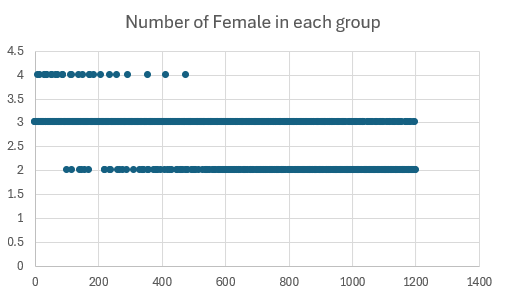
###
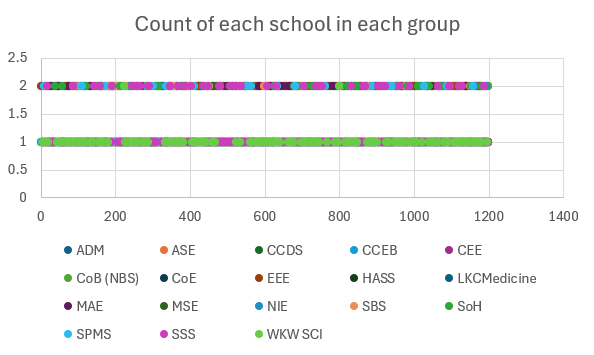
###
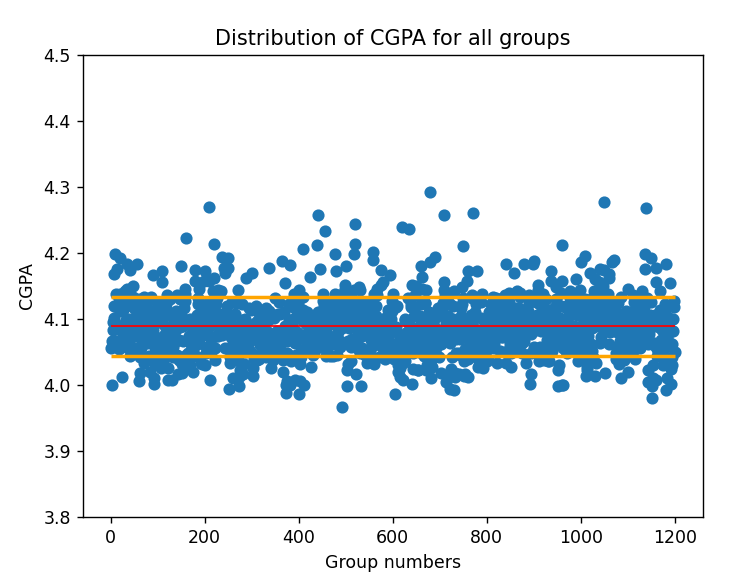

### Computational thinking

## Abstraction

Data Abstraction: Essential attributes of each student which are Tutorial Group, Student ID, School, Name, Gender, and CGPA are taken into account. 

Structural Abstraction: Simplifies the problem by defining lists and dictionaries to represent students and groups, storing each student’s data as a dictionary with keys ( ‘Tutorial Group’, ‘Student ID’, ‘School’, ‘Name’, ‘Gender’, ‘CGPA’). This makes it easier to access and process specific parts of data.

Functional Abstraction: We use functions like split_into_groups, check_balance and check_the_same_school to ensure that grouping, checking and balancing processes are clear and do not need to repeatedly write those codes, making the code more reusable and isolates logic into separate functions that can be called when needed.



## Decomposition

Reading Data : Our code first reads the data from the CSV file and stores it in a structured format in STUDENTS_LIST to ensure data is accessible ( list of dictionaries) for other operations and other steps can build on and rely on this.

Grouping by Tutorial : The split_into_groups function groups students by tutorial so that we can simplify the problem by looking at group by group. It breaks down the students into groups of 50 for each tutorial group and 10 teams in each group to achieve balanced and diverse teams.

Sorting: We use sorting functions like cgpa_groups and gender_groups to organize the students within each tutorial group, to make it easier to form balanced groups.

Balancing: We use check_balance and check_the_same_school functions to check for diversity in CGPA, gender and school within each team and this part only focuses on balance checks and does not overlap or interfere with the grouping and sorting codes.


Finally, the program saves the new organized data into a new CSV file so it is independent of the data processing aspect.



## Pattern Recognition

We identify students based on commonality such as tutorial groups and CGPA, genders and schools in this case so that we can store them using keys in a dictionary. 

To avoid a majority from one school or gender we make use of check_balance and check_the_same_school functions that lead to adjustments and ensure patterns of team composition are followed.

Our program uses the check_the_same_school function when an imbalance occurs to identify the problem pattern and reassign members across the groups.




## Algorithm Design + Evaluation

Shown above


### Conclusion
To meet the requirements of our project and create teams which are well balanced and diverse in terms of schools, gender and CGPA we have created this algorithm that effectively divides the 6000 students into 120 tutorial groups and into groups of 5 students each. We made use of the computational thinking process principles – abstraction, decomposition, pattern recognition and algorithm design to ensure our code is readable and reusable and efficient. We have also tackled our challenges by testing out various methods and finding the most suited approach while ensuring that the groups are balanced using our check, balance functions. We have hence come up with this algorithm to address the project issue. 